In [1]:
import pandas as pd
import numpy as np
from jcopml.automl import AutoRegressor

C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import Data

In [3]:
df = pd.read_csv("data/train.csv", index_col="ID")
df.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
ID,,,,,,,,
250,321,111,3,3.5,4.0,8.83,1,0.77
434,316,111,4,4.0,5.0,8.54,0,0.71
20,303,102,3,3.5,3.0,8.50,0,0.62
323,314,107,2,2.5,4.0,8.27,0,0.72
333,308,106,3,3.5,2.5,8.21,1,0.75


# Data Splitting

In [4]:
X = df.drop(columns="Chance_of_Admit")
y = df.Chance_of_Admit

# Training

In [5]:
model = AutoRegressor(["GRE", "TOEFL", "CGPA", "SOP", "LOR"], ["University_Rating", "Research"])

In [6]:
model.fit(X, y, cv=5, n_trial=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.9s finished


================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.0027013518760465897
algo__fit_intercept       | True
algo__l1_ratio            | 0.7508710677914976

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='mean')
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.818591638868765
Valid: 0.8062268870689848
Test : 0.8315556604492648


In [7]:
import jcopml
jcopml.__version__

'1.1.5'

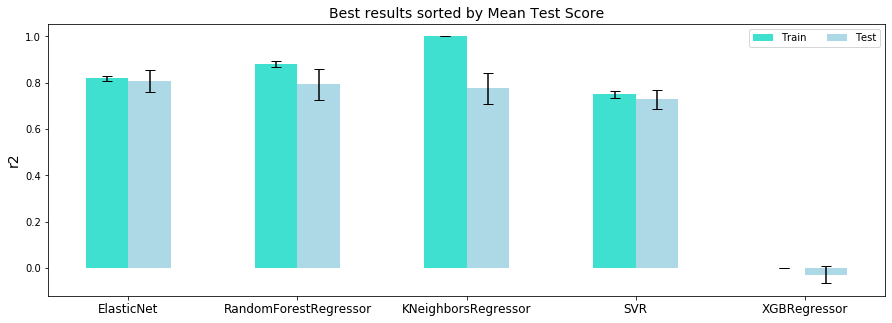

In [8]:
model.plot_results()

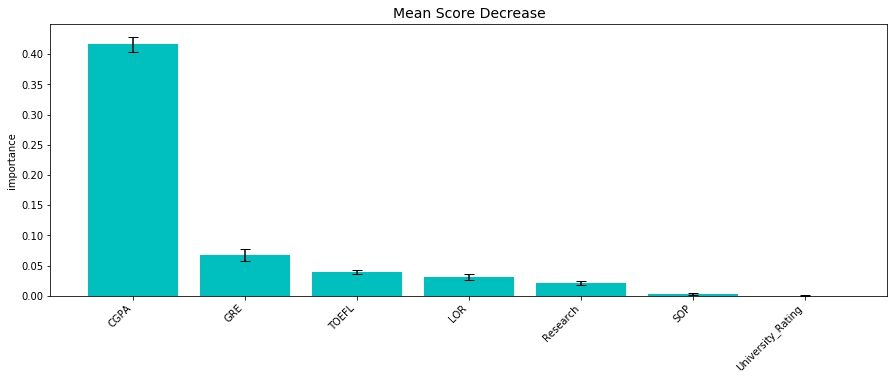

In [9]:
model.mean_score_decrease()

In [10]:
model.fit(X, y, cv=5, algo="enet", poly=True, n_trial=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   26.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.3s finished
C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\preprocessing\_data.py:2970: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.004848496183873295
algo__fit_intercept       | False
algo__l1_ratio            | 0.2759991820225434

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='mean')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.8203712343033693
Valid: 0.8069680403124322
Test : 0.8223929420170142


In [ ]:
def submit(model, filename="automl__v2.csv"):
    df_submit = pd.read_csv("data/test.csv", index_col="ID")
    df_submit['Chance_of_Admit'] = model.predict(df_submit)
    df_submit[['Chance_of_Admit']].to_csv(filename, index_label='ID')

In [ ]:
submit(model)